In [26]:
import pandas as pd
from  sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,  plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,  f1_score, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [28]:
boston = pd.read_csv('Boston.csv')
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [30]:
X, y = boston.drop('medv', axis=1) , boston['medv']
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3, random_state=24)

In [42]:
from sklearn.pipeline import Pipeline
from tqdm import tqdm 

scores = []
depth = [2,4,6,None]
split = [2,5,10,20]
leaf = [1,5,10,20]

scaler  = StandardScaler()


for i in tqdm(range(len(depth))):
    for j in split:
        for k in leaf:
            dtr =  DecisionTreeRegressor(random_state=24, max_depth= depth[i], min_samples_split=j, min_samples_leaf=k)
            pipe = Pipeline([('scaler', scaler) , ('DTR', dtr)])
            pipe.fit(X_train, Y_train)
            y_pred = pipe.predict(X_test)
            scores.append([depth[i],j,k,r2_score(Y_test, y_pred)])
df1 = pd.DataFrame(scores)
df1.sort_values(3 , ascending = False)            

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 14.30it/s]


,0,1,2,3
60,NaN,20,1,0.725231
44,6.0,20,1,0.718381
52,NaN,5,1,0.714670
56,NaN,10,1,0.712486
40,6.0,10,1,0.708031
...,...,...,...,...
13,2.0,20,5,0.589384
14,2.0,20,10,0.589384
15,2.0,20,20,0.589384
1,2.0,2,5,0.589384


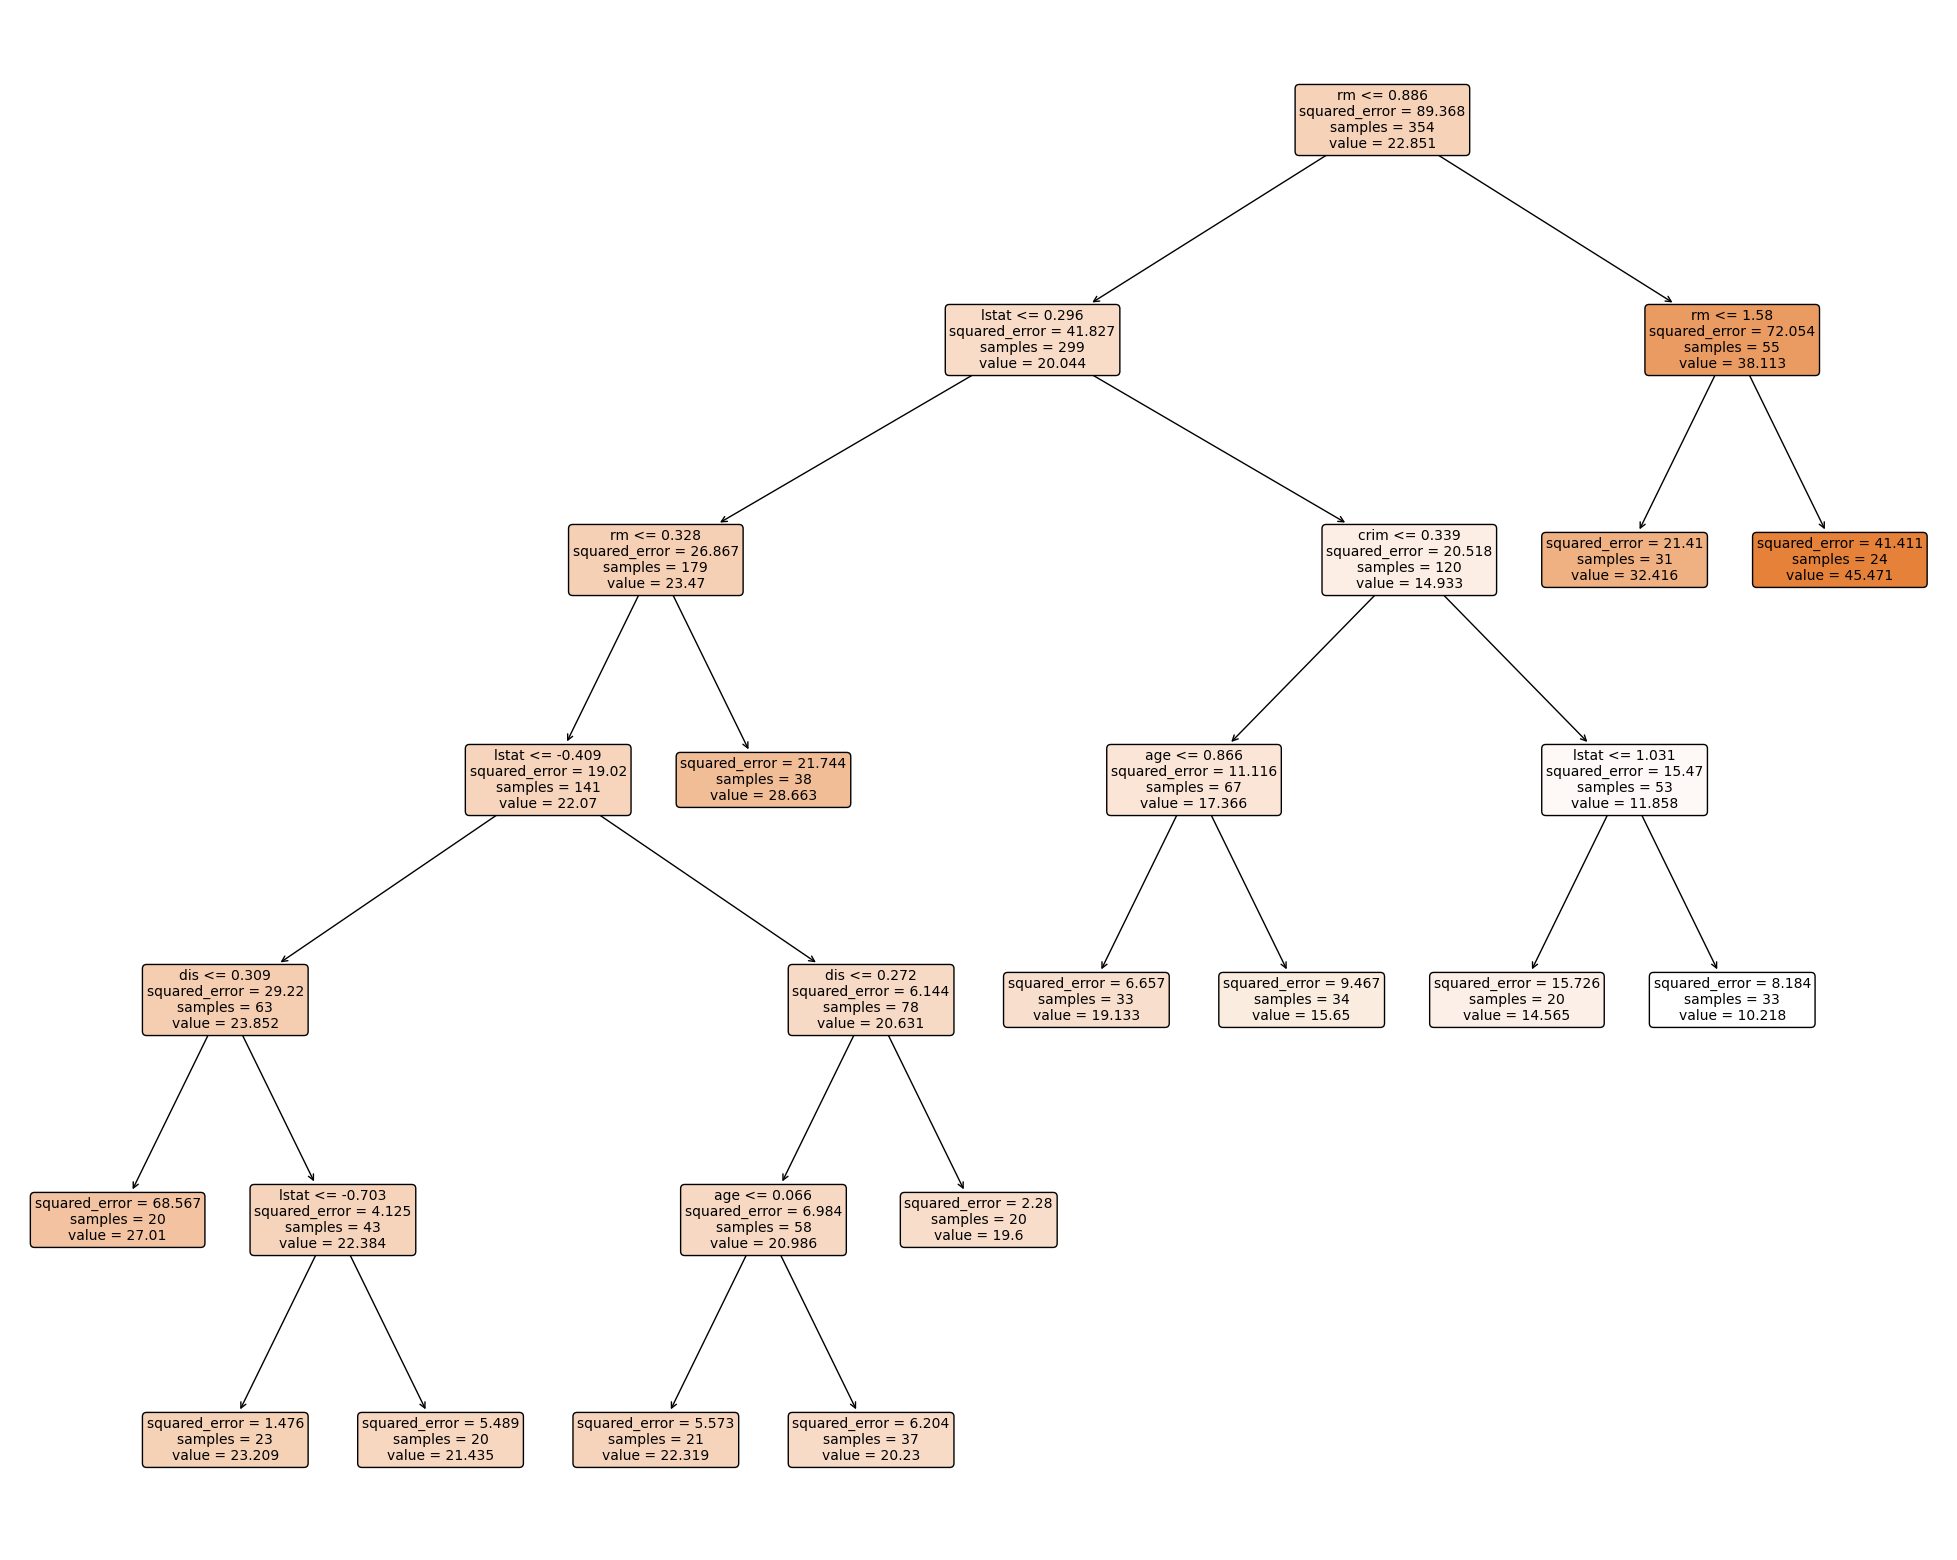

In [44]:
import matplotlib.pyplot as plt


plt.figure(figsize=(25, 20))
plot_tree(
    dtr, 
    feature_names=list(X.columns),  # Corrected list syntax
               # Assuming these are the correct class names
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


In [46]:
dtr.feature_importances_

array([0.03436154, 0.        , 0.        , 0.        , 0.        ,
       0.71876235, 0.01001848, 0.01227989, 0.        , 0.        ,
       0.        , 0.        , 0.22457775])

In [54]:
df_imp = pd.DataFrame({'Importance':dtr.feature_importances_ , 'Column': list(X.columns)})
df_imp.sort_values('Importance', ascending=False)

,Importance,Column
5,0.718762,rm
12,0.224578,lstat
0,0.034362,crim
7,0.012280,dis
6,0.010018,age
1,0.000000,zn
2,0.000000,indus
3,0.000000,chas
4,0.000000,nox
8,0.000000,rad


Text(0.5, 1.0, 'Features Importance')

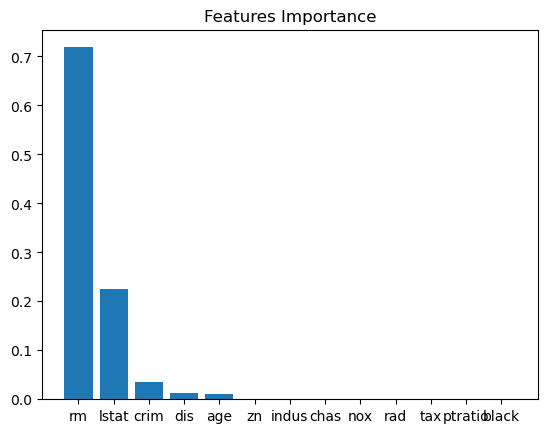

In [52]:
df_imp.sort_values( 'Importance' , ascending=False, inplace=True)

plt.bar(df_imp['Column'], df_imp['Importance'])
plt.title('Features Importance')